# Beach Water Safety Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

"Data Import and Formatting"

# Open json as DataFrame
dataset = "data\\beach_data\\HanlansPointAll.json"
data = pd.read_json(dataset)

# Extract information from the data column
beach_data = pd.DataFrame([elems[0] for elems in data['data'] if elems is not None]) # Dereference information from elems, which is a list of dictionaries
data = pd.concat([data, beach_data], axis=1) # Concatenate dereferenced data to the original dataframe 

# Drop redundant columns
data = data.drop(["data"], axis=1)

# Drop weird column
data = data.drop("statusFlagPre", axis=1) # We don't know what this describes 

# Drop rows with invalid status flag?
data = data.dropna(subset="statusFlag")

# Convert CollectionDate into datetime object 
datetimes = pd.to_datetime(data['CollectionDate'])

# Add date-time to new columns
data['CollectionDate'] = datetimes
# data['year'] = datetimes.dt.year
# data['month'] = datetimes.dt.month
# data['day'] = datetimes.dt.day

# print(data['advisory'].unique())
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1671 entries, 0 to 1670
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CollectionDate  1671 non-null   datetime64[ns]
 1   beachId         1671 non-null   float64       
 2   beachName       1671 non-null   object        
 3   eColi           1567 non-null   float64       
 4   advisory        1671 non-null   object        
 5   statusFlag      1671 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 91.4+ KB


Data exploration and stuff

In [2]:
# Print ecoli NaN entries
print(data.drop(['beachName', 'beachId'], axis=1).loc[data['eColi'].isna()]) # Some entries have the "safe" status despite no data

# Print unique status flags
# print(data['statusFlag'].unique()) # Consider dropping NO_DATA and UNTESTED entries?
print(data['CollectionDate'].dt.year.unique())

     CollectionDate  eColi                                           advisory  \
0        2024-09-07    NaN         There is no data available for this beach.   
1        2024-09-06    NaN         There is no data available for this beach.   
2        2024-09-05    NaN         There is no data available for this beach.   
3        2024-09-04    NaN         There is no data available for this beach.   
4        2024-09-03    NaN         There is no data available for this beach.   
...             ...    ...                                                ...   
1523     2010-07-08    NaN                                Data not available.   
1527     2010-07-04    NaN                                Data not available.   
1573     2009-08-27    NaN                                Data not available.   
1624     2009-07-07    NaN  Beach posted unsafe- Dredging and construction...   
1635     2009-06-26    NaN  Beach posted unsafe- Dredging and construction...   

     statusFlag  
0       N

In [3]:
has_large_ecoli = data['eColi'] >= 1000
data.loc[has_large_ecoli]
print(data.loc[has_large_ecoli])

# data.loc[data['CollectionDate'].between(pd.Timestamp("2019-08-24"), pd.Timestamp("2019-09-2"))]

# 696 ecoli on Hanlan's Point 2019-08-29?
# But same day at Woodbine Beach has only 12 e coli?

Empty DataFrame
Columns: [CollectionDate, beachId, beachName, eColi, advisory, statusFlag]
Index: []


In [14]:
data['CollectionDate'].loc[data['CollectionDate'].dt.year == 2011].shape[0]

103

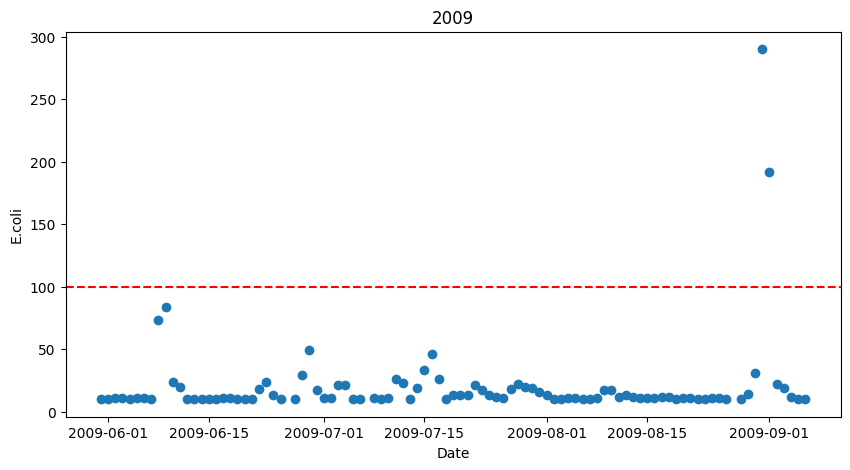

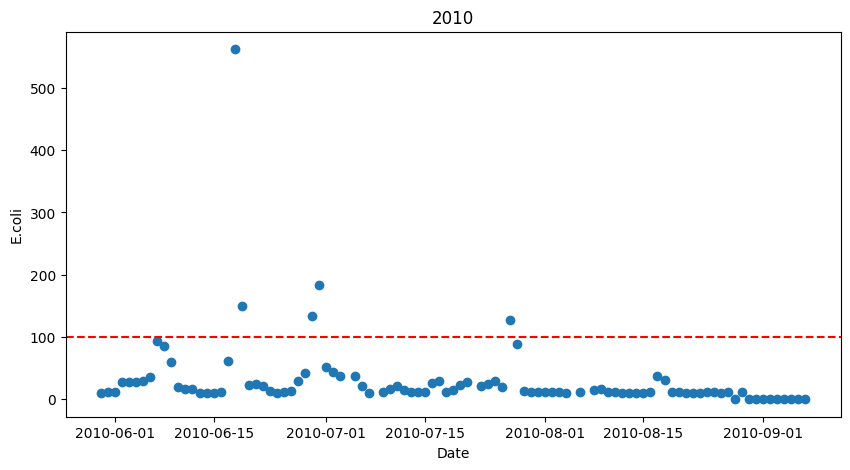

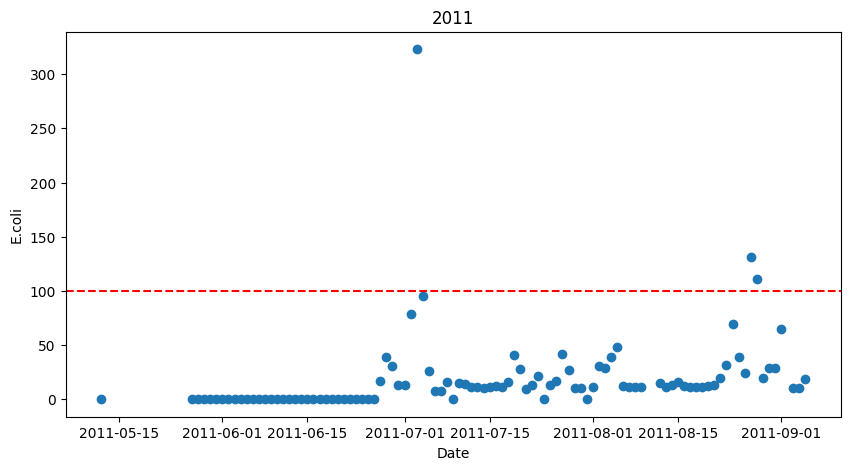

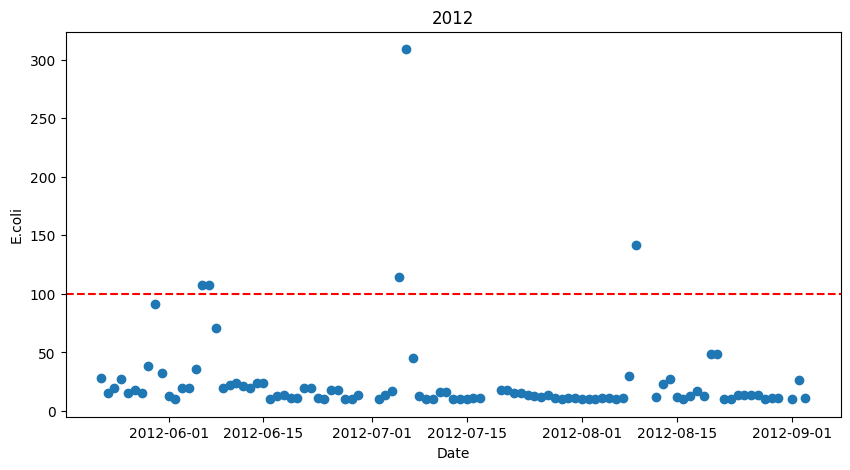

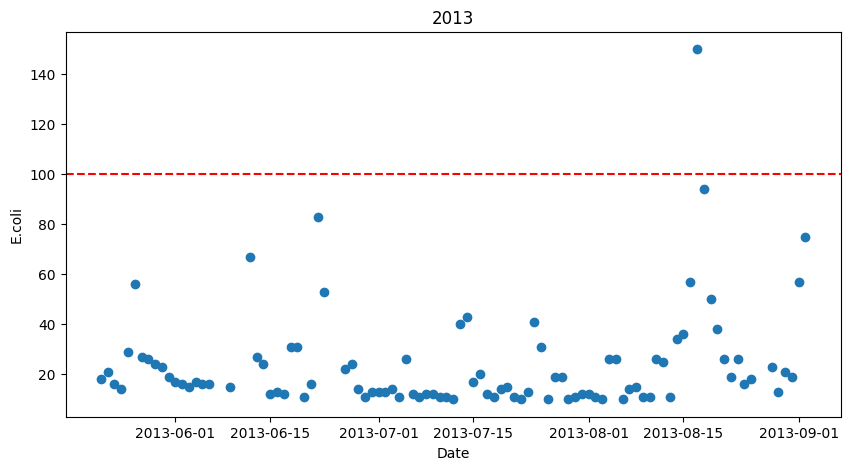

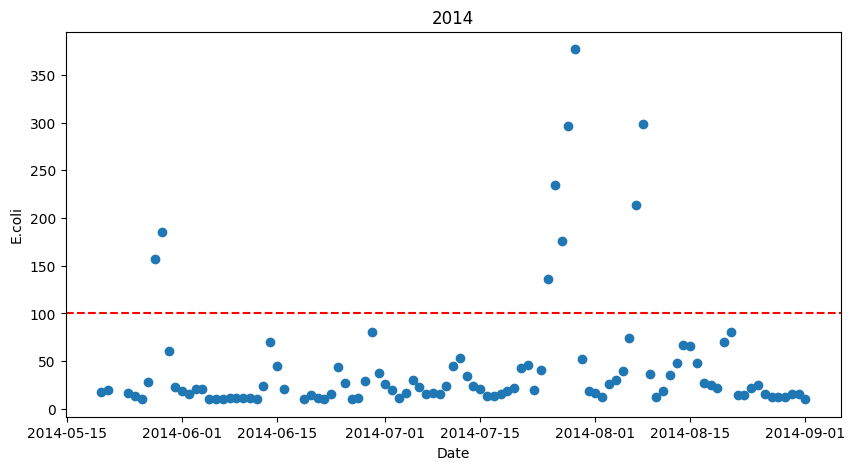

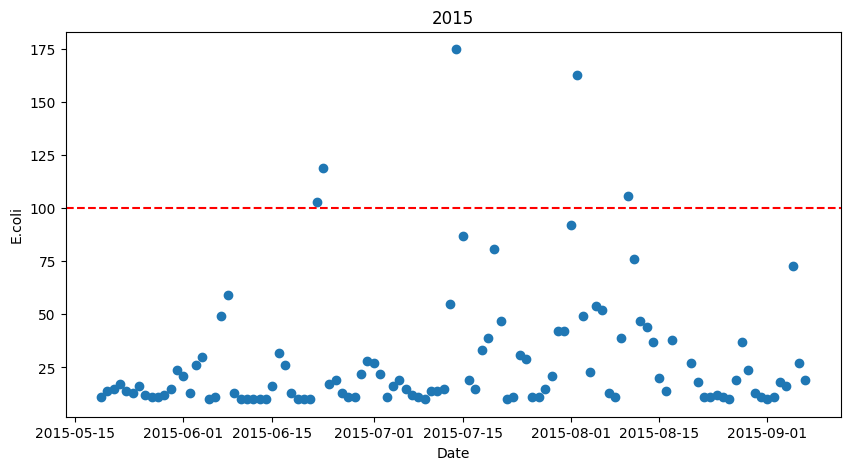

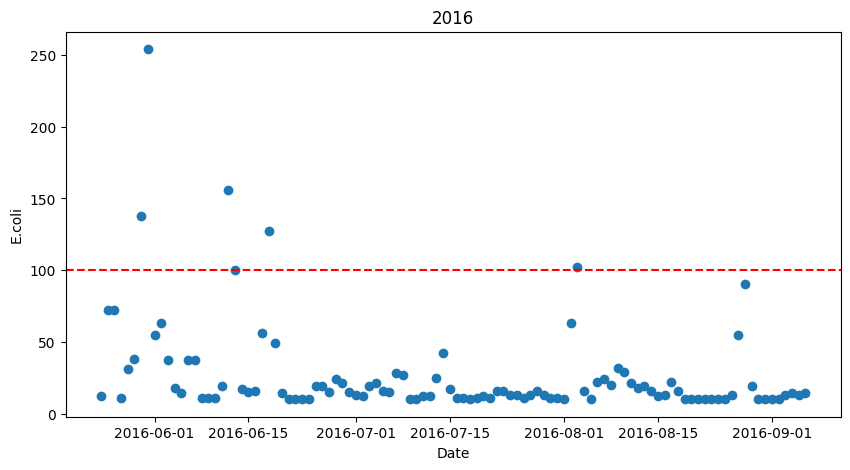

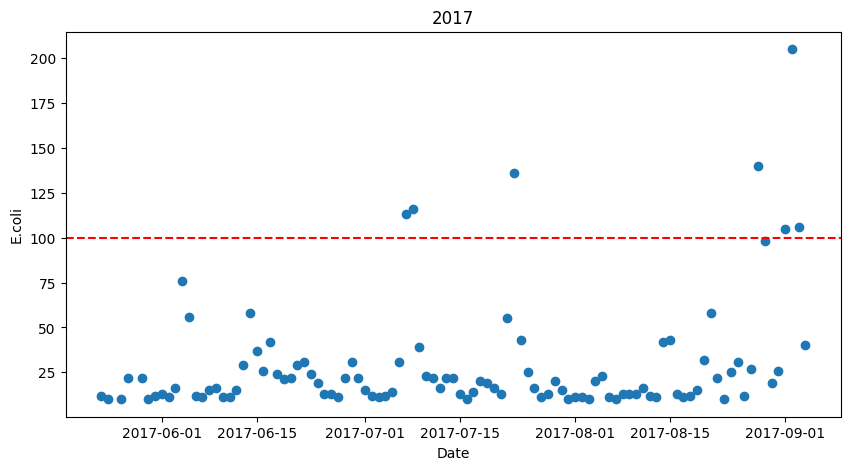

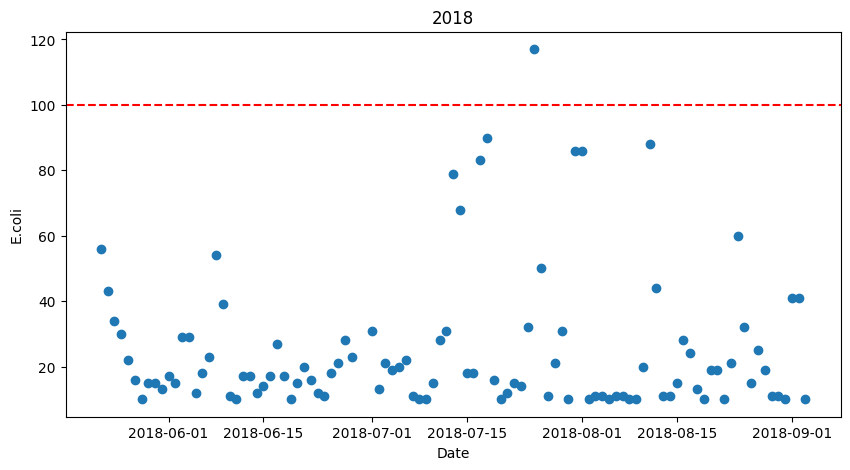

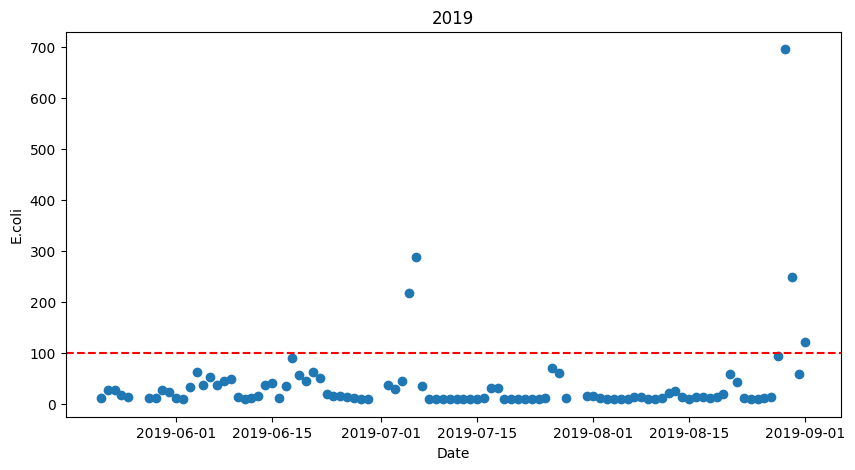

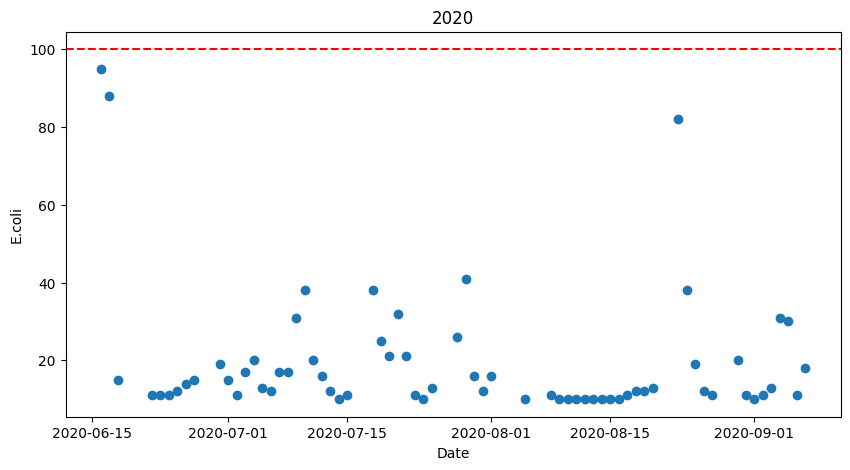

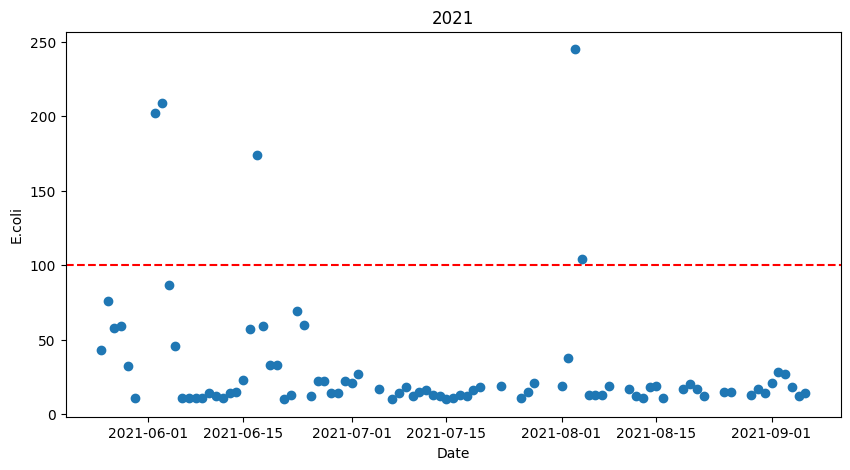

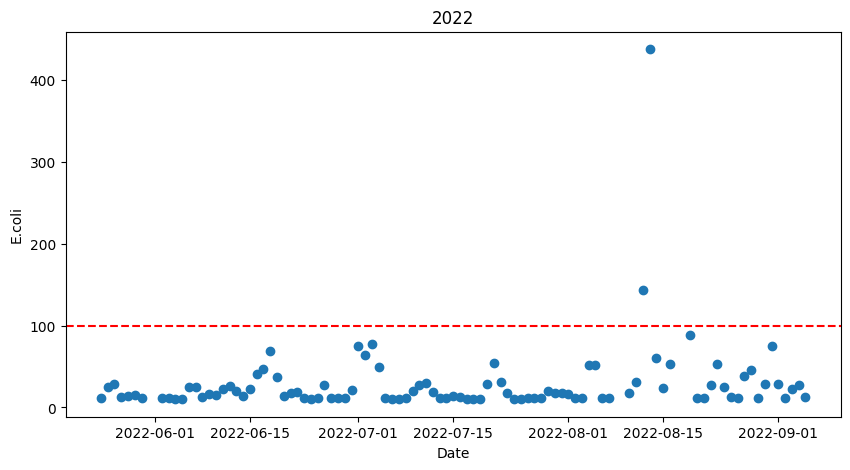

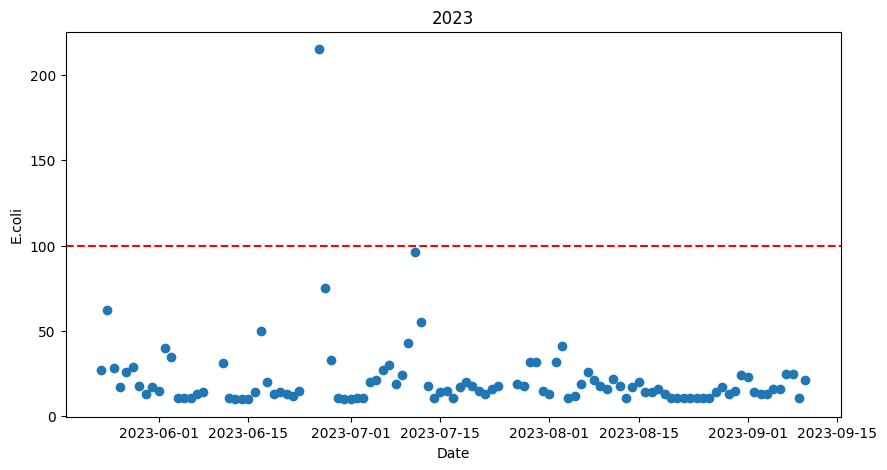

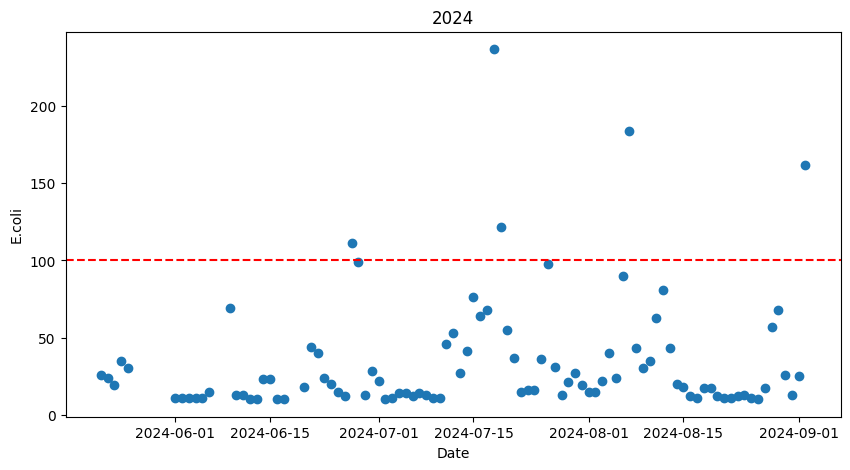

In [8]:
for i in range(2009, 2025):
    plt.figure(figsize=(10,5))
    plt.scatter(data['CollectionDate'].loc[data['CollectionDate'].dt.year == i], data['eColi'].loc[data['CollectionDate'].dt.year == i], label=f"")
    plt.xlabel("Date")
    plt.ylabel("E.coli")
    plt.axhline(100, linestyle='--', color='r')
    plt.title(f"{i}")
    plt.show()

In [6]:
has_large_ecoli = beach_data['eColi'] >= 400
print(beach_data.loc[has_large_ecoli])

      beachId             beachName  eColi  \
244         3  Hanlan's Point Beach  438.0   
517         3  Hanlan's Point Beach  696.0   
1543        3  Hanlan's Point Beach  562.0   

                                               advisory statusFlag  \
244   E.coli levels exceed the City of Toronto's  es...     UNSAFE   
517   E. coli levels exceed the provincially establi...     UNSAFE   
1543  Beach posted unsafe. E.coli levels above 100 p...     UNSAFE   

     statusFlagPre  
244           None  
517           None  
1543          None  


- traditional time series modelling vs NN vs state space models 
- first, statistical correlation between climate and beach readings?
- decide what method of weather forecasting: rolling vs long term 
- circumvent the data sparsity -> deep learning or state space models?

TODO: 
- focus on seeing is there a correlation between weather data and water safety to begin with 
- me: manual feature selection?
- eamon: automatic feature selection?
- model selection? 
- is there existing forecasting data? see if we can use that 